<div style="text-align:center">

### **FOOD DEMAND PROJECT** [🔗](https://datahack.analyticsvidhya.com/contest/genpact-machine-learning-hackathon-1/#ProblemStatement)

</div>

<div style="text-align:center">
    <img src="images/encabezado.jpg" alt="Encabezado" width="450"/>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
Train= pd.read_csv('../Data/train.csv')
center_info= pd.read_csv('../Data/fulfilment_center_info.csv')
meal_info= pd.read_csv('../Data/meal_info.csv')

In [4]:
print("Dataframe 1" ,Train.shape)
print("Dataframe 2" ,center_info.shape)
print("Dataframe 3" ,meal_info.shape)

Dataframe 1 (456548, 9)
Dataframe 2 (77, 5)
Dataframe 3 (51, 3)


In [5]:
print (Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
None


In [6]:
Train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [8]:
center_info.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [10]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [11]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [14]:
test_data= pd.read_csv('../Data/test_QoiMO9B.csv')
test_data.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


### Merge

In [15]:
# funtion to merge any dataframe with center_info and meal_info

def merge_data(df):
    df = pd.merge(df, center_info, on='center_id')
    data = pd.merge(df, meal_info, on='meal_id')
    return data

In [16]:
data= merge_data(Train)
print(data.shape)
data.head(3)

(456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai


In [17]:
data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [18]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


### EDA

In [19]:
# Move target variable to the end of the dataframe

data = data[[c for c in data if c not in ['num_orders']] + ['num_orders']]


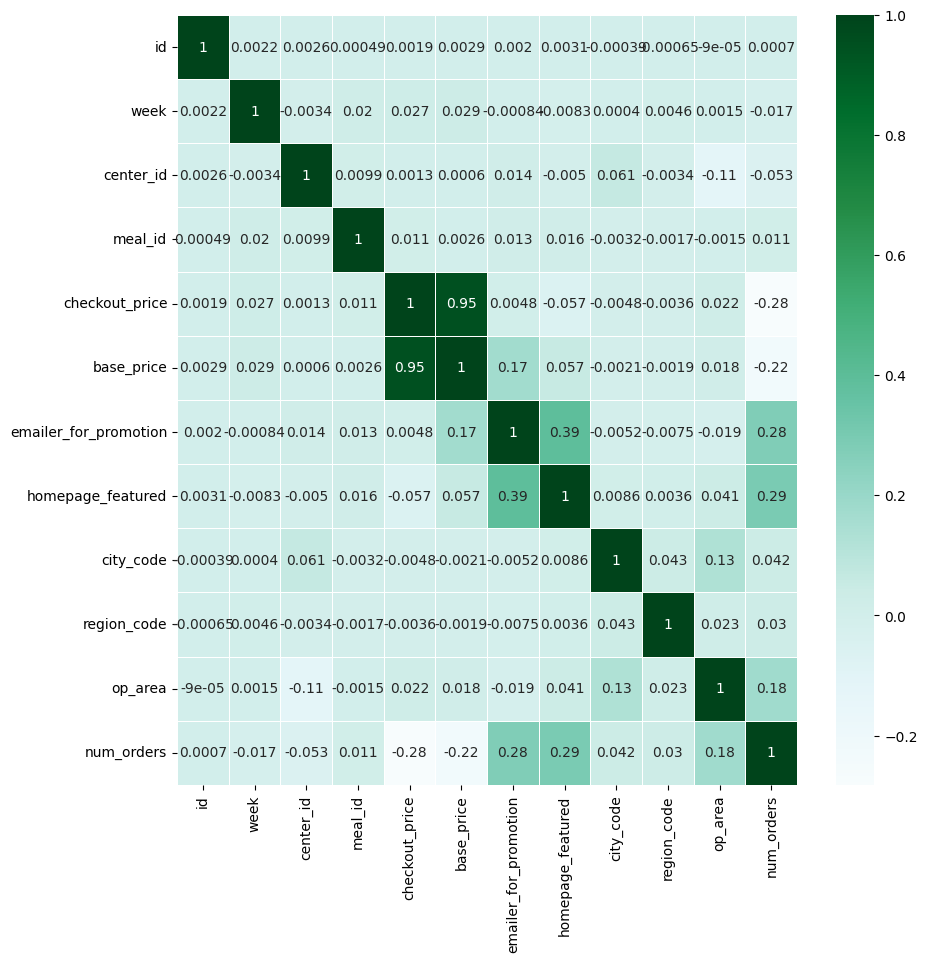

In [20]:
# Heat map to check the correlation between numeric variables 

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='BuGn', linewidths=0.5)
plt.show()


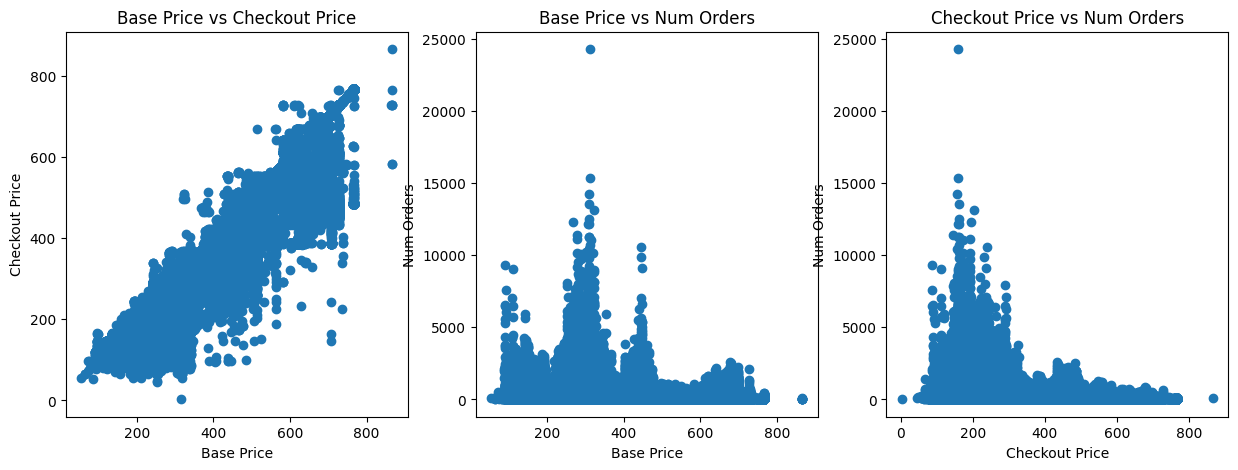

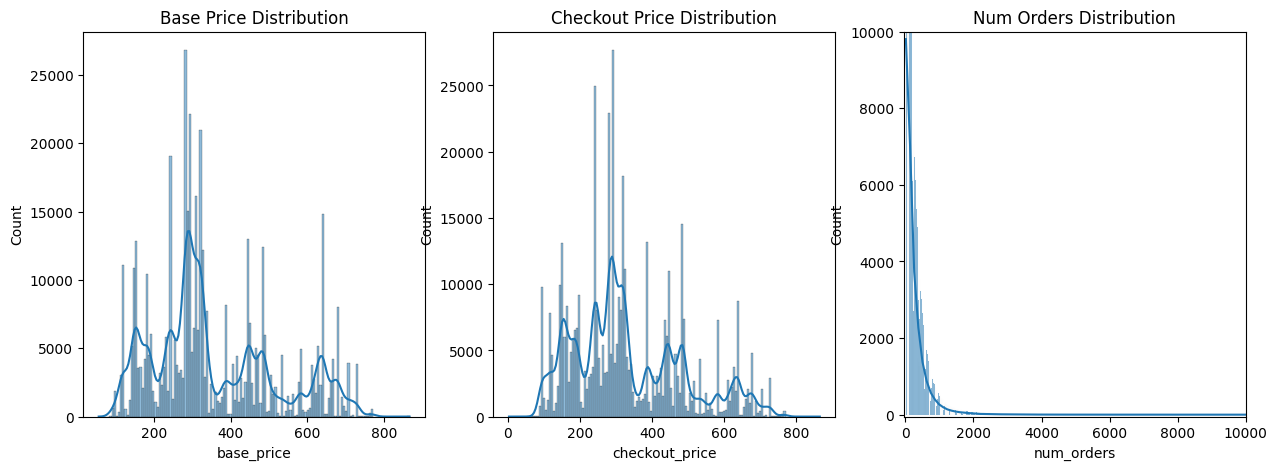

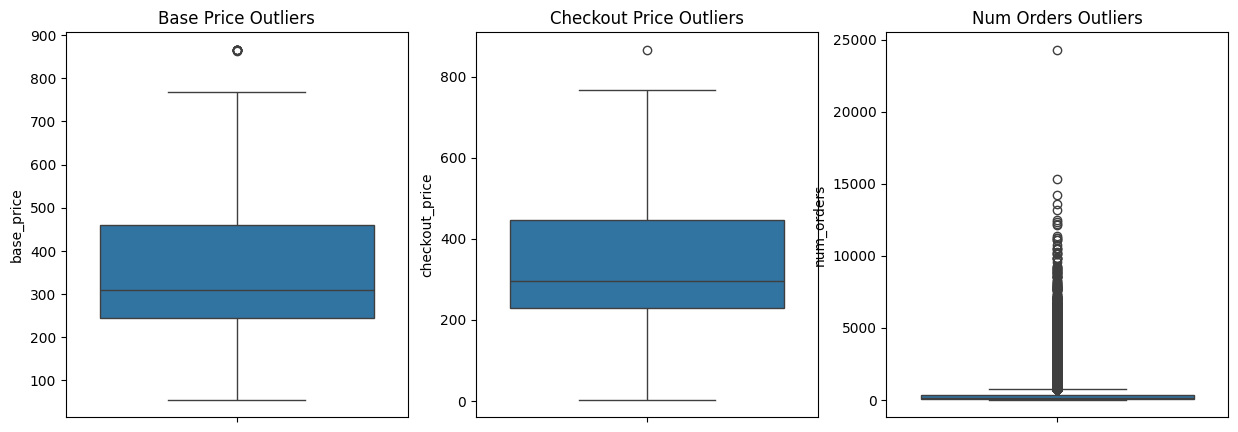

In [21]:
# Visualizing:
# 1. Base Price vs checkout_price   
# 2. Base Price vs num_orders
# 3. Checkout Price vs num_orders

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(data['base_price'], data['checkout_price'])
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.title('Base Price vs Checkout Price')

plt.subplot(1,3,2)
plt.scatter(data['base_price'], data['num_orders'])
plt.xlabel('Base Price')
plt.ylabel('Num Orders')
plt.title('Base Price vs Num Orders')

plt.subplot(1,3,3)
plt.scatter(data['checkout_price'], data['num_orders'])
plt.xlabel('Checkout Price')
plt.ylabel('Num Orders')
plt.title('Checkout Price vs Num Orders')
plt.show()

# histplot base_price, checkout_price and num_orders and calculate normal distribution

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data['base_price'], kde=True)
plt.title('Base Price Distribution')

plt.subplot(1,3,2)
sns.histplot(data['checkout_price'], kde=True)
plt.title('Checkout Price Distribution')

plt.subplot(1,3,3)
sns.histplot(data['num_orders'], kde=True)
plt.title('Num Orders Distribution')
# lim axis y
plt.ylim(-50, 10000)
plt.xlim(-50, 10000)
plt.show()

# Boxplot to check the outliers in base_price, checkout_price and num_orders

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data['base_price'])
plt.title('Base Price Outliers')

plt.subplot(1,3,2)
sns.boxplot(data['checkout_price'])
plt.title('Checkout Price Outliers')

plt.subplot(1,3,3)
sns.boxplot(data['num_orders'])
plt.title('Num Orders Outliers')
plt.show()


In [22]:
# Errase base_price column as it is highly correlated with checkout_price and less correlated with num_orders

data.drop('base_price', axis=1, inplace=True)

In [23]:
#Unique values in categorical columns

category_columns = data.select_dtypes(include=['object']).columns

for i in category_columns:
    print(i, data[i].nunique())

print("\n")

for i in category_columns:
    print(i, data[i].unique())

center_type 3
category 14
cuisine 4


center_type ['TYPE_C' 'TYPE_B' 'TYPE_A']
category ['Beverages' 'Rice Bowl' 'Starters' 'Pasta' 'Sandwich' 'Biryani' 'Extras'
 'Pizza' 'Seafood' 'Other Snacks' 'Desert' 'Soup' 'Salad' 'Fish']
cuisine ['Thai' 'Indian' 'Italian' 'Continental']


In [24]:
print("Center_id nuniques: ", data.center_id.nunique())
print("Meal_id nuniques: ", data.meal_id.nunique())
print("City_code nuniques: ", data.city_code.nunique())
print("Region_code nuniques: ", data.region_code.nunique())

Center_id nuniques:  77
Meal_id nuniques:  51
City_code nuniques:  51
Region_code nuniques:  8


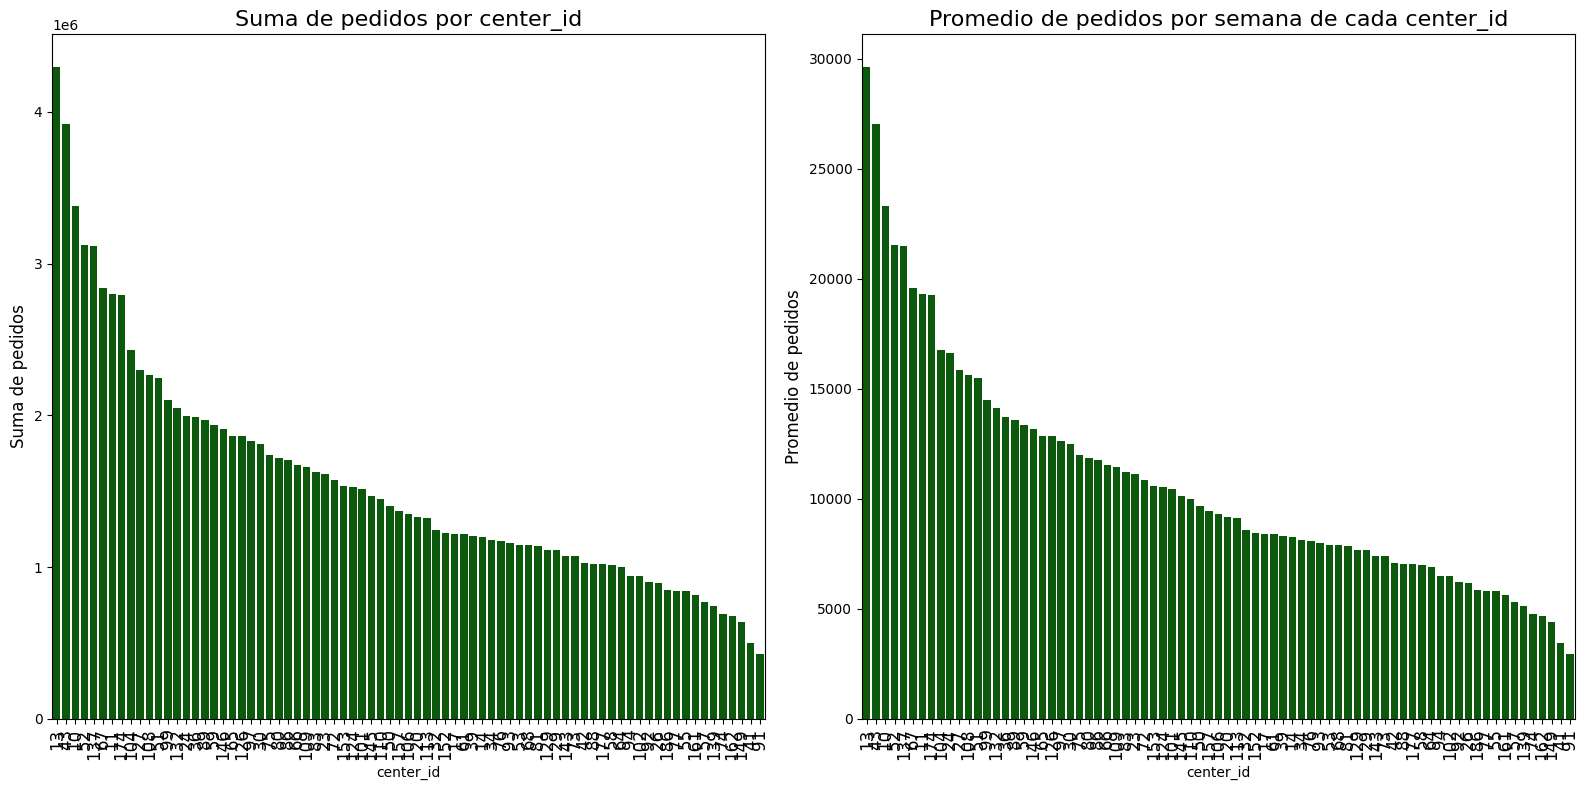

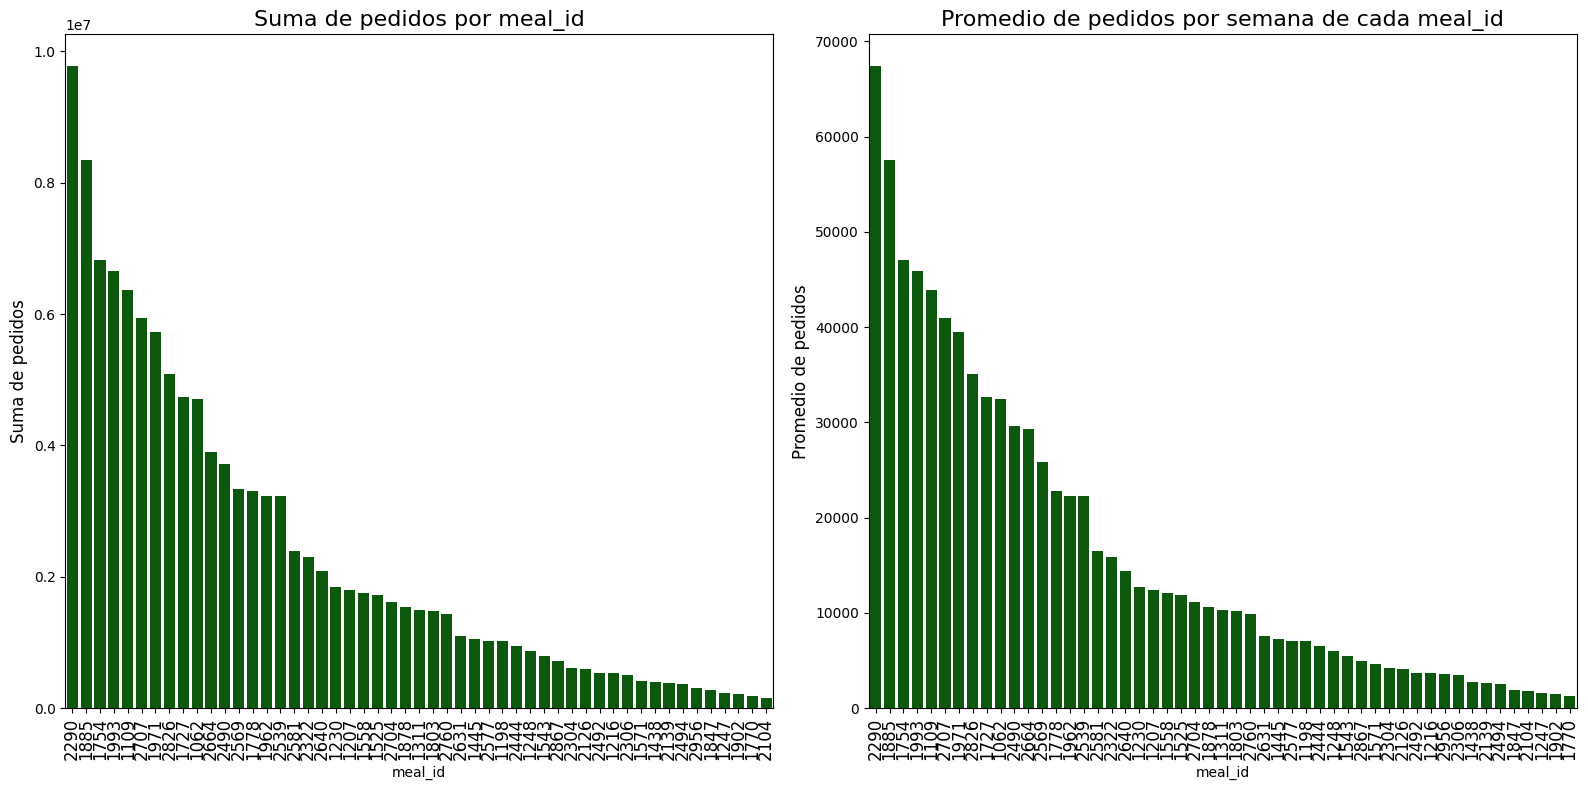

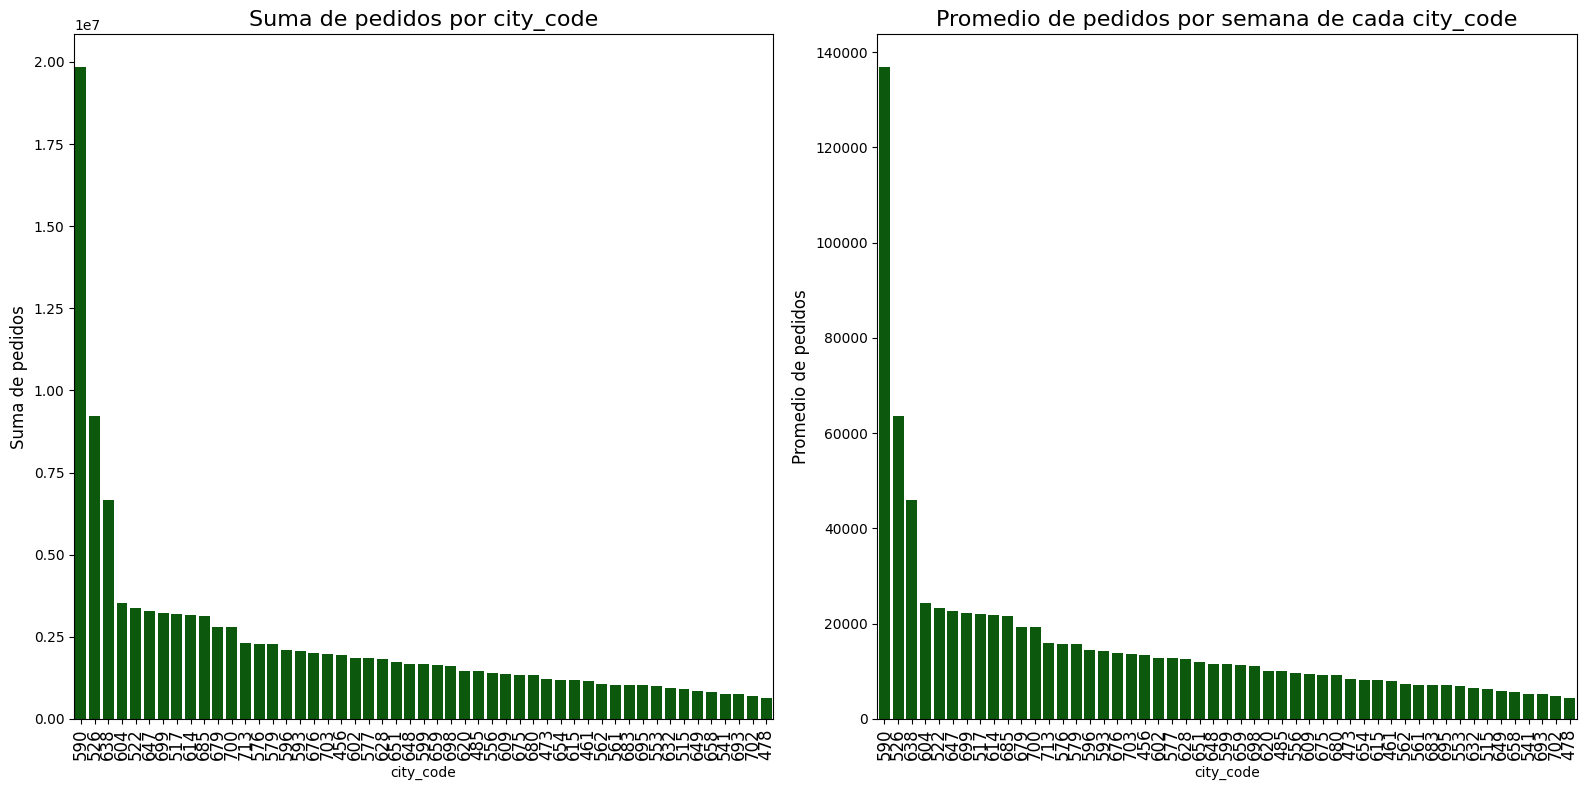

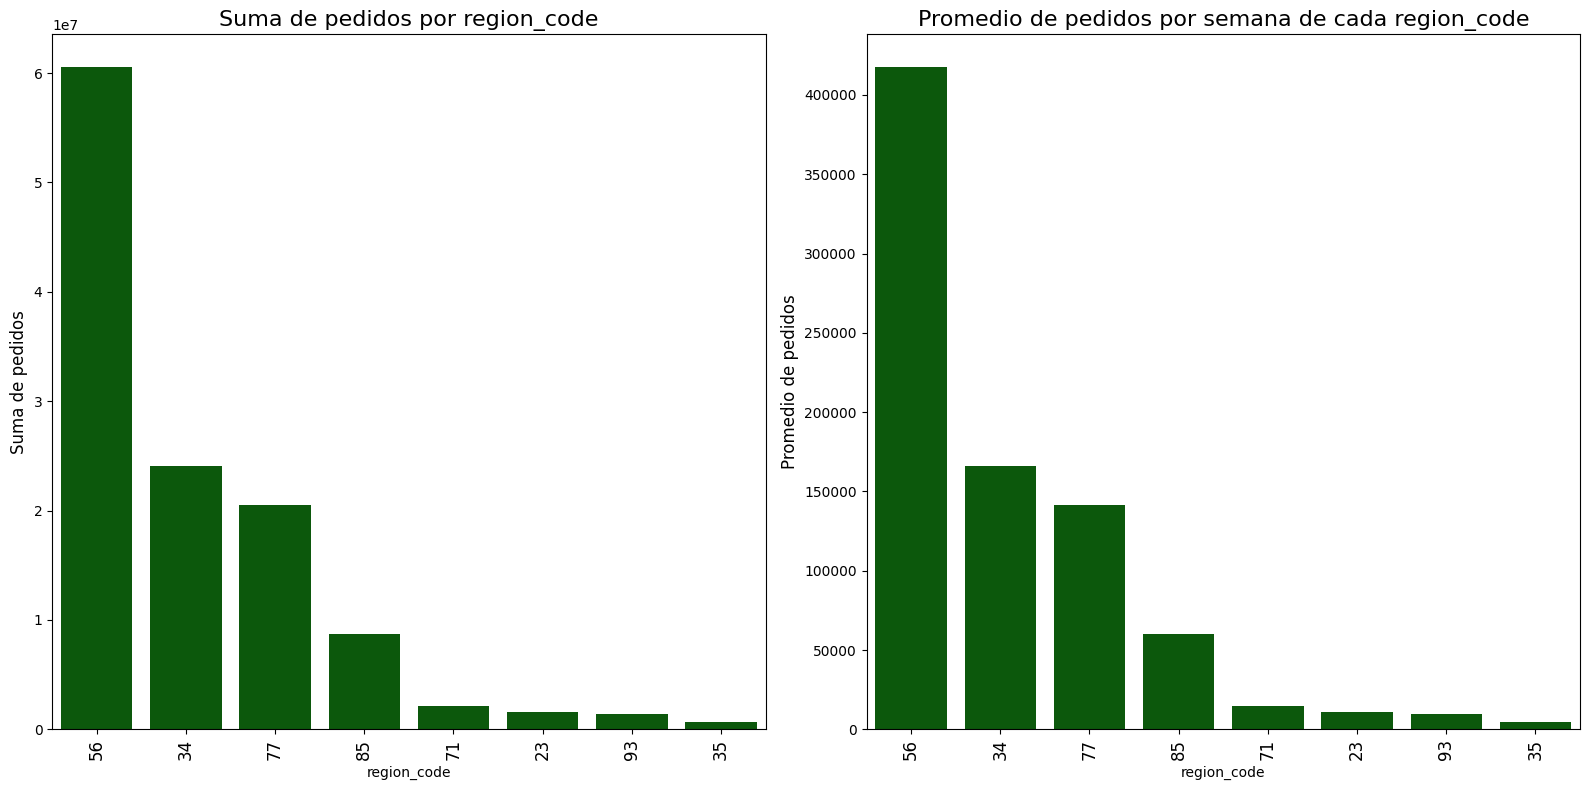

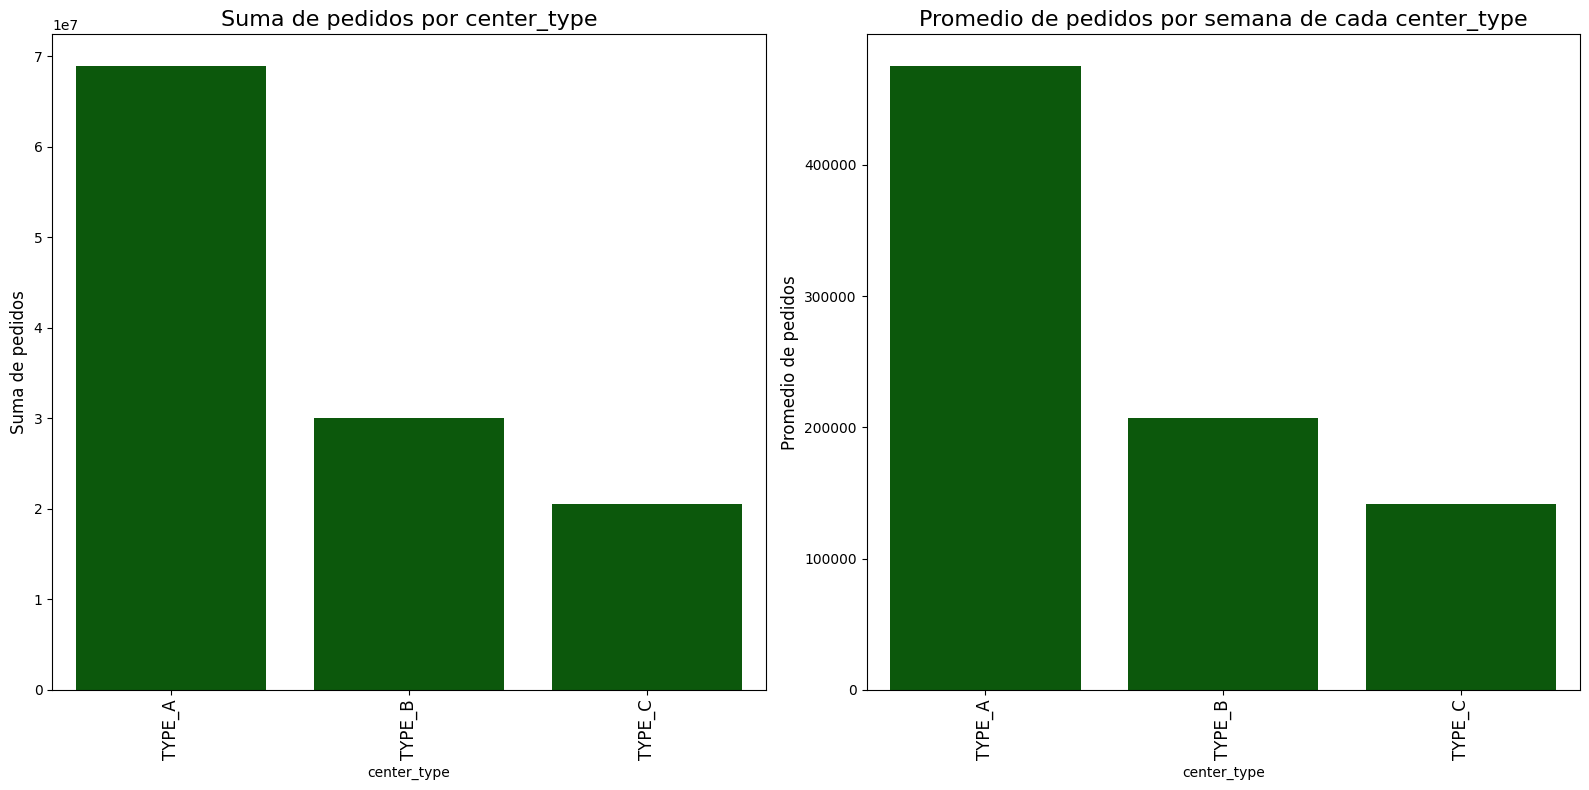

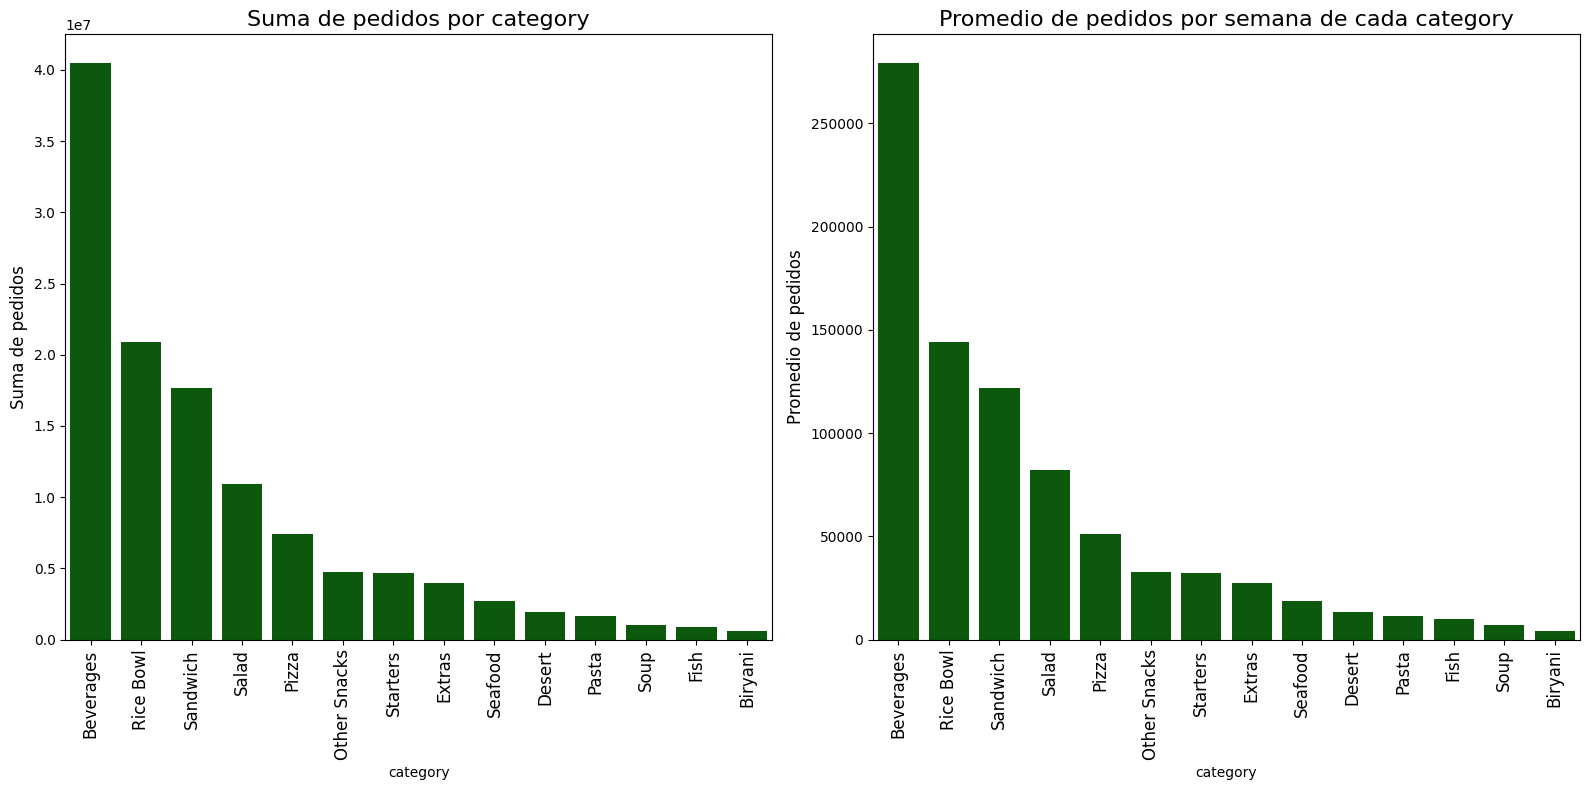

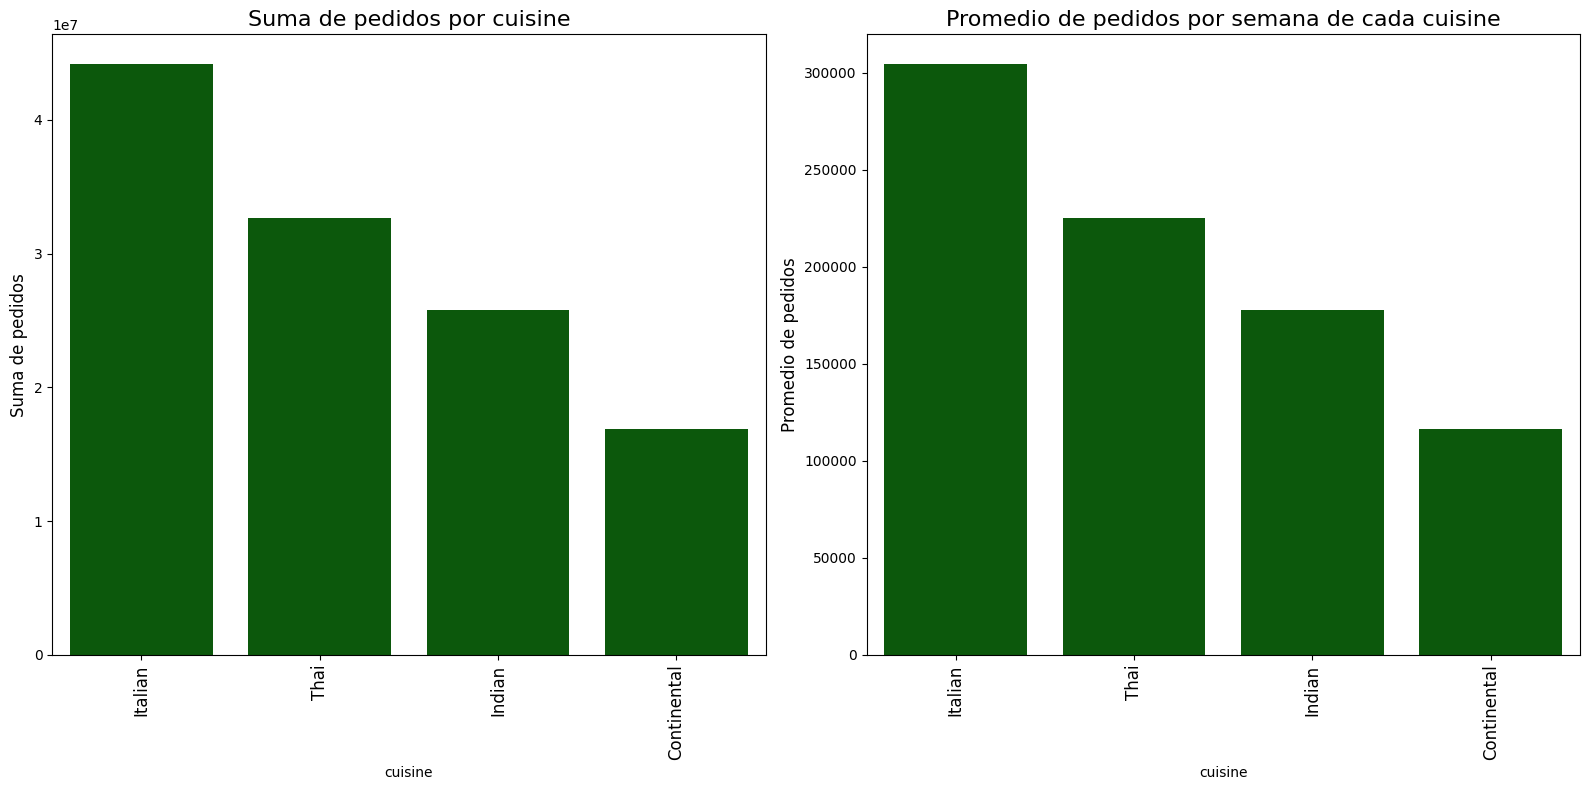

In [26]:
df = data.copy()

# Función para graficar las sumas y promedios por semana
def plot_category_statistics(df, category_columns):
    for col in category_columns:
        # Crear subplots
        fig, axs = plt.subplots(1, 2, figsize=(16, 8))

        # Suma de pedidos por cada categoría
        sum_order_df = df.groupby(col)['num_orders'].sum().reset_index().sort_values(by='num_orders', ascending=False)
        sns.barplot(x=col, y='num_orders', data=sum_order_df, estimator=sum, ax=axs[0], order=sum_order_df[col], color="darkgreen")
        axs[0].set_title(f'Suma de pedidos por {col}', fontsize=16)  # Aumentar el tamaño del título
        axs[0].set_ylabel('Suma de pedidos', fontsize=12)  # Aumentar el tamaño del título del eje y
        axs[0].tick_params(axis='x', rotation=90, labelsize=12)  # Rotar etiquetas del eje x y ajustar el tamaño de la letra

        # Promedio de pedidos por semana para cada categoría
        df_sum_by_week = df.groupby([col, 'week'])['num_orders'].sum().reset_index()
        df_avg_by_category = df_sum_by_week.groupby(col)['num_orders'].mean().reset_index()
        df_avg_by_category = df_avg_by_category.sort_values(by='num_orders', ascending=False)  # Ordenar el DataFrame
        sns.barplot(x=col, y='num_orders', data=df_avg_by_category, ax=axs[1], order=df_avg_by_category[col], color="darkgreen")
        axs[1].set_title(f'Promedio de pedidos por semana de cada {col}', fontsize=16)  # Aumentar el tamaño del título
        axs[1].set_ylabel('Promedio de pedidos', fontsize=12)  # Aumentar el tamaño del título del eje y
        axs[1].tick_params(axis='x', rotation=90, labelsize=12)  # Rotar etiquetas del eje x y ajustar el tamaño de la letra

        # Ajustar el diseño
        plt.tight_layout()
        plt.show()

# Lista de columnas de categoría para graficar
category_columns = ['center_id', 'meal_id', 'city_code', 'region_code', 'center_type', 'category', 'cuisine']

# Generar las gráficas para el DataFrame completo
plot_category_statistics(df, category_columns)

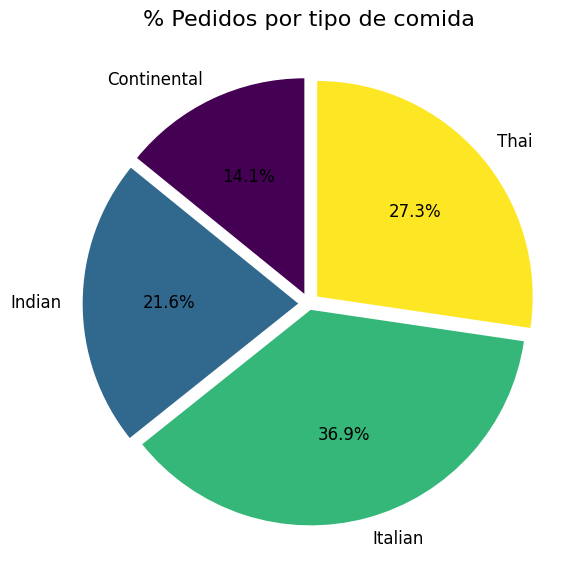

In [42]:
#pie plot funtion for cusine category
plt.figure(figsize=(6,6))
colors = ['#440154','#31688e','#35b779','#fde725']
plt.pie(df.groupby(['cuisine']).num_orders.sum(),
    labels=df.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('% Pedidos por tipo de comida', fontsize=16)
plt.tight_layout()
plt.show()

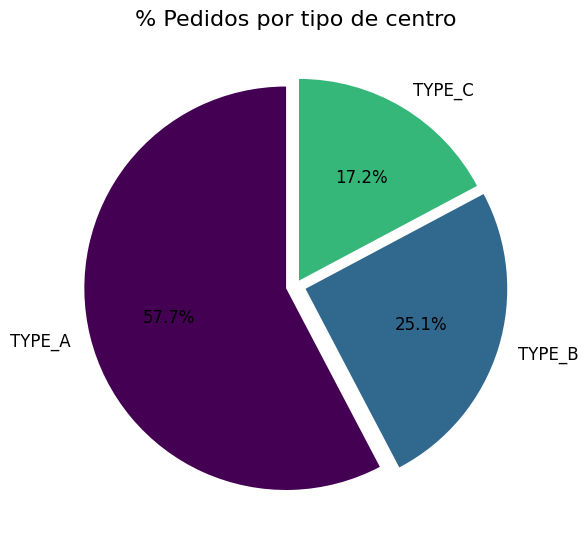

In [28]:
# pie plot for center_type category
plt.figure(figsize=(6,6))
colors = ['#440154','#31688e','#35b779']
plt.pie(df.groupby(['center_type']).num_orders.sum(),
    labels=df.groupby(['center_type']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('% Pedidos por tipo de centro', fontsize=16)
plt.tight_layout()
plt.show()

In [36]:
len(df['region_code'].unique())

8

In [61]:
import matplotlib.cm as cm

def get_viridis_colors(n_bins):
    """
    Obtiene una lista de colores del colormap viridis.
    
    :param n_bins: Número de bins (categorías) en el gráfico.
    :return: Lista de colores en formato hexadecimal.
    """
    cmap = cm.get_cmap('viridis', n_bins)
    return [cmap(i) for i in range(n_bins)]

def plot_pie_charts(df, columns):
    """
    Crea gráficos de pastel para las columnas especificadas en el DataFrame.
    
    :param df: DataFrame que contiene los datos.
    :param columns: Lista de columnas para las que se crearán los gráficos de pastel.
    """
    for column in columns:
        # Verificar si la columna existe en el DataFrame
        if column not in df.columns:
            print(f"Columna {column} no encontrada en el DataFrame.")
            continue
        
        # Número de categorías en la columna
        n_bins = df[column].nunique()
        
        # Obtener colores viridis
        colors = get_viridis_colors(n_bins)
        
        # Agrupar por la columna y sumar las órdenes
        data = df.groupby([column]).num_orders.sum()
        
        # Crear el gráfico de pastel
        plt.figure(figsize=(6, 6))
        plt.pie(data,
                labels=data.index,
                shadow=False,
                colors=colors,
                explode=[0.05] * n_bins,
                startangle=90, 
                autopct='%1.1f%%', pctdistance=0.9,
                textprops={'fontsize': 8})
        plt.title(f"% de pedidos por {column}")
        plt.show()

C:\Users\karen\AppData\Local\Temp\ipykernel_8228\90568272.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', n_bins)


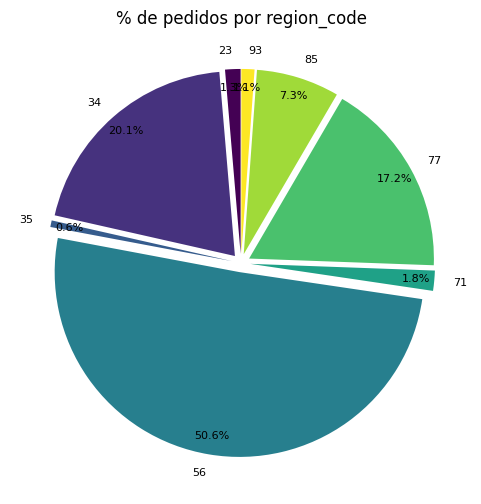

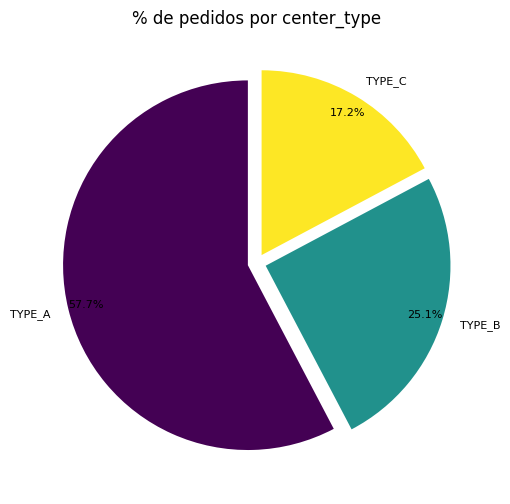

C:\Users\karen\AppData\Local\Temp\ipykernel_8228\90568272.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', n_bins)


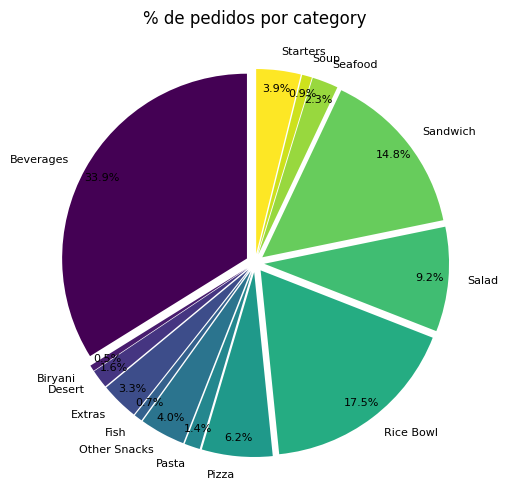

C:\Users\karen\AppData\Local\Temp\ipykernel_8228\90568272.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', n_bins)


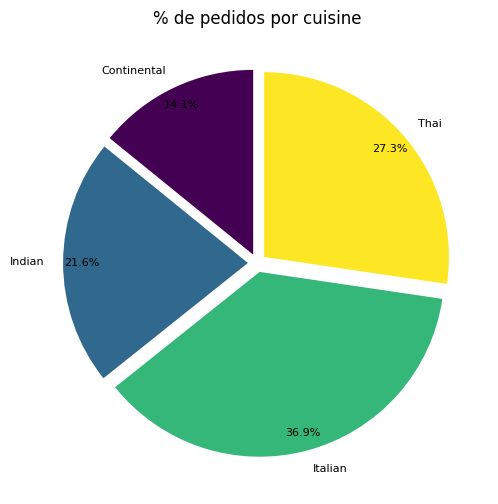

In [62]:
#Grafico de columnas 

columns = ['region_code', 'center_type', 'category', 'cuisine']

plot_pie_charts(df, columns)

In [ ]:
data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'num_orders'],
      dtype='object')

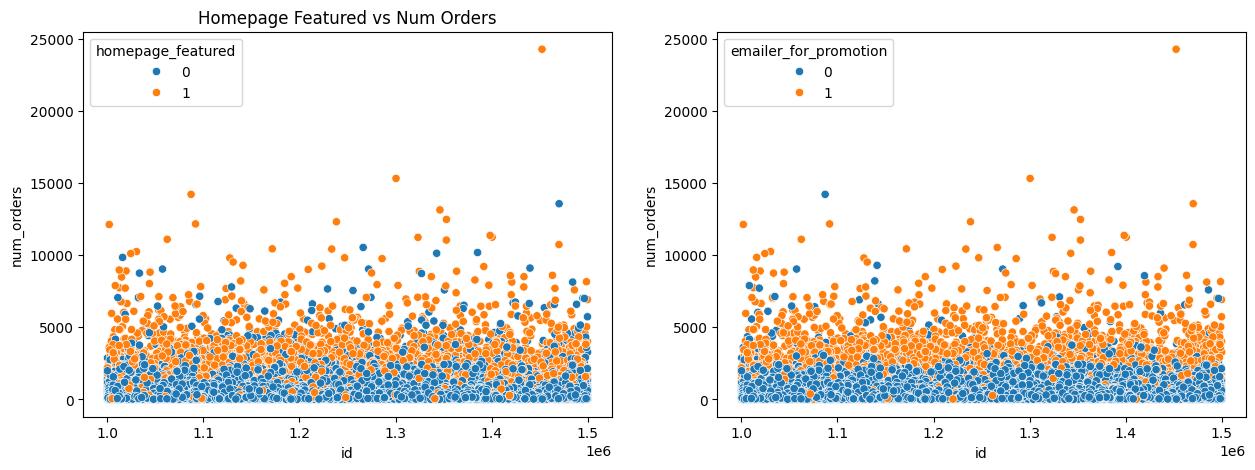

In [ ]:
# Visualization of Homepage_featured, emailer_for_promotion with num_orders, hue= category

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='id', y='num_orders', data=data, hue='homepage_featured')
plt.title('Homepage Featured vs Num Orders')

plt.subplot(1,2,2)
sns.scatterplot(x='id', y='num_orders', data=data, hue='emailer_for_promotion')
plt.show()

In [ ]:
# Describe homepage_featured and emailer_for_promotion  

data[['homepage_featured', 'emailer_for_promotion']].describe()

,homepage_featured,emailer_for_promotion
count,456548.00000,456548.000000
mean,0.10920,0.081152
std,0.31189,0.273069
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.00000,0.000000
max,1.00000,1.000000


In [ ]:
# correlation between homepage_featured and emailer_for_promotion

data[['homepage_featured', 'emailer_for_promotion']].corr()

,homepage_featured,emailer_for_promotion
homepage_featured,1.000000,0.390534
emailer_for_promotion,0.390534,1.000000


In [ ]:
# Create a unique id for the combination of center_id and meal_id
data['center_meal_id'] = data['center_id'].astype(str) + '_' + data['meal_id'].astype(str)

In [ ]:
# Drop columns center_id and meal_id
data.drop(['center_id', 'meal_id'], axis=1, inplace=True)

In [ ]:
# Check the unique values of center_meal_id
data['center_meal_id'].nunique()

3597

In [ ]:
# Categorization of center_meal_id
data['center_meal_id'] = data['center_meal_id'].astype('category').cat.codes

# Check the unique values of center_meal_id
data['center_meal_id'].nunique()

3597

In [ ]:
# mean encoding of center_meal_id
mean_encoding = data.groupby('center_meal_id')['num_orders'].mean().to_dict()
data['center_meal_id_mean'] = data['center_meal_id'].map(mean_encoding)

# Check the unique values of center_meal_id
data['center_meal_id_mean'].nunique()

3571

In [ ]:
data[data["center_meal_id"]== 2995].head(2)

,id,week,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,num_orders,center_meal_id,center_meal_id_mean
2205,1283588,1,601.46,1,0,614,85,TYPE_A,3.0,Pizza,Continental,215,2995,224.020979
5111,1151595,2,583.03,1,0,614,85,TYPE_A,3.0,Pizza,Continental,284,2995,224.020979


In [ ]:
# encode week beetwen 1-52
data['week'] = ((data['week'] - 1) % 52) + 1

In [ ]:
data.head(2)

,id,week,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,num_orders,center_meal_id,center_meal_id_mean
0,1379560,1,136.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai,177,2335,230.324138
1,1466964,1,136.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai,270,2339,246.972414


In [ ]:
# get dummies of category 
data = pd.get_dummies(data, columns=['category', 'cuisine', 'center_type'], drop_first=True, dtype=int)

In [ ]:
data.shape

(456548, 29)

In [ ]:
data.head(2)

,id,week,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,num_orders,center_meal_id,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,136.83,0,0,647,56,2.0,177,2335,...,0,0,0,0,0,0,0,1,0,1
1,1466964,1,136.83,0,0,647,56,2.0,270,2339,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
data.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52], dtype=int64)

In [ ]:
#Create a new column with the secuqece of order by center_meal_id
data['order_rank'] = data.groupby('center_meal_id').cumcount()+1

# Verificar el DataFrame resultante
data[data["center_meal_id"]== 2335].head(5)

,id,week,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,num_orders,center_meal_id,...,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,order_rank
0,1379560,1,136.83,0,0,647,56,2.0,177,2335,...,0,0,0,0,0,0,1,0,1,1
2922,1018704,2,135.83,0,0,647,56,2.0,323,2335,...,0,0,0,0,0,0,1,0,1,2
5818,1196273,3,132.92,0,0,647,56,2.0,96,2335,...,0,0,0,0,0,0,1,0,1,3
8717,1116527,4,135.86,0,0,647,56,2.0,163,2335,...,0,0,0,0,0,0,1,0,1,4
11606,1343872,5,146.50,0,0,647,56,2.0,215,2335,...,0,0,0,0,0,0,1,0,1,5


In [ ]:
#move target variable to the end of the dataframe
data = data[[c for c in data if c not in ['num_orders']] + ['num_orders']]

<Axes: >

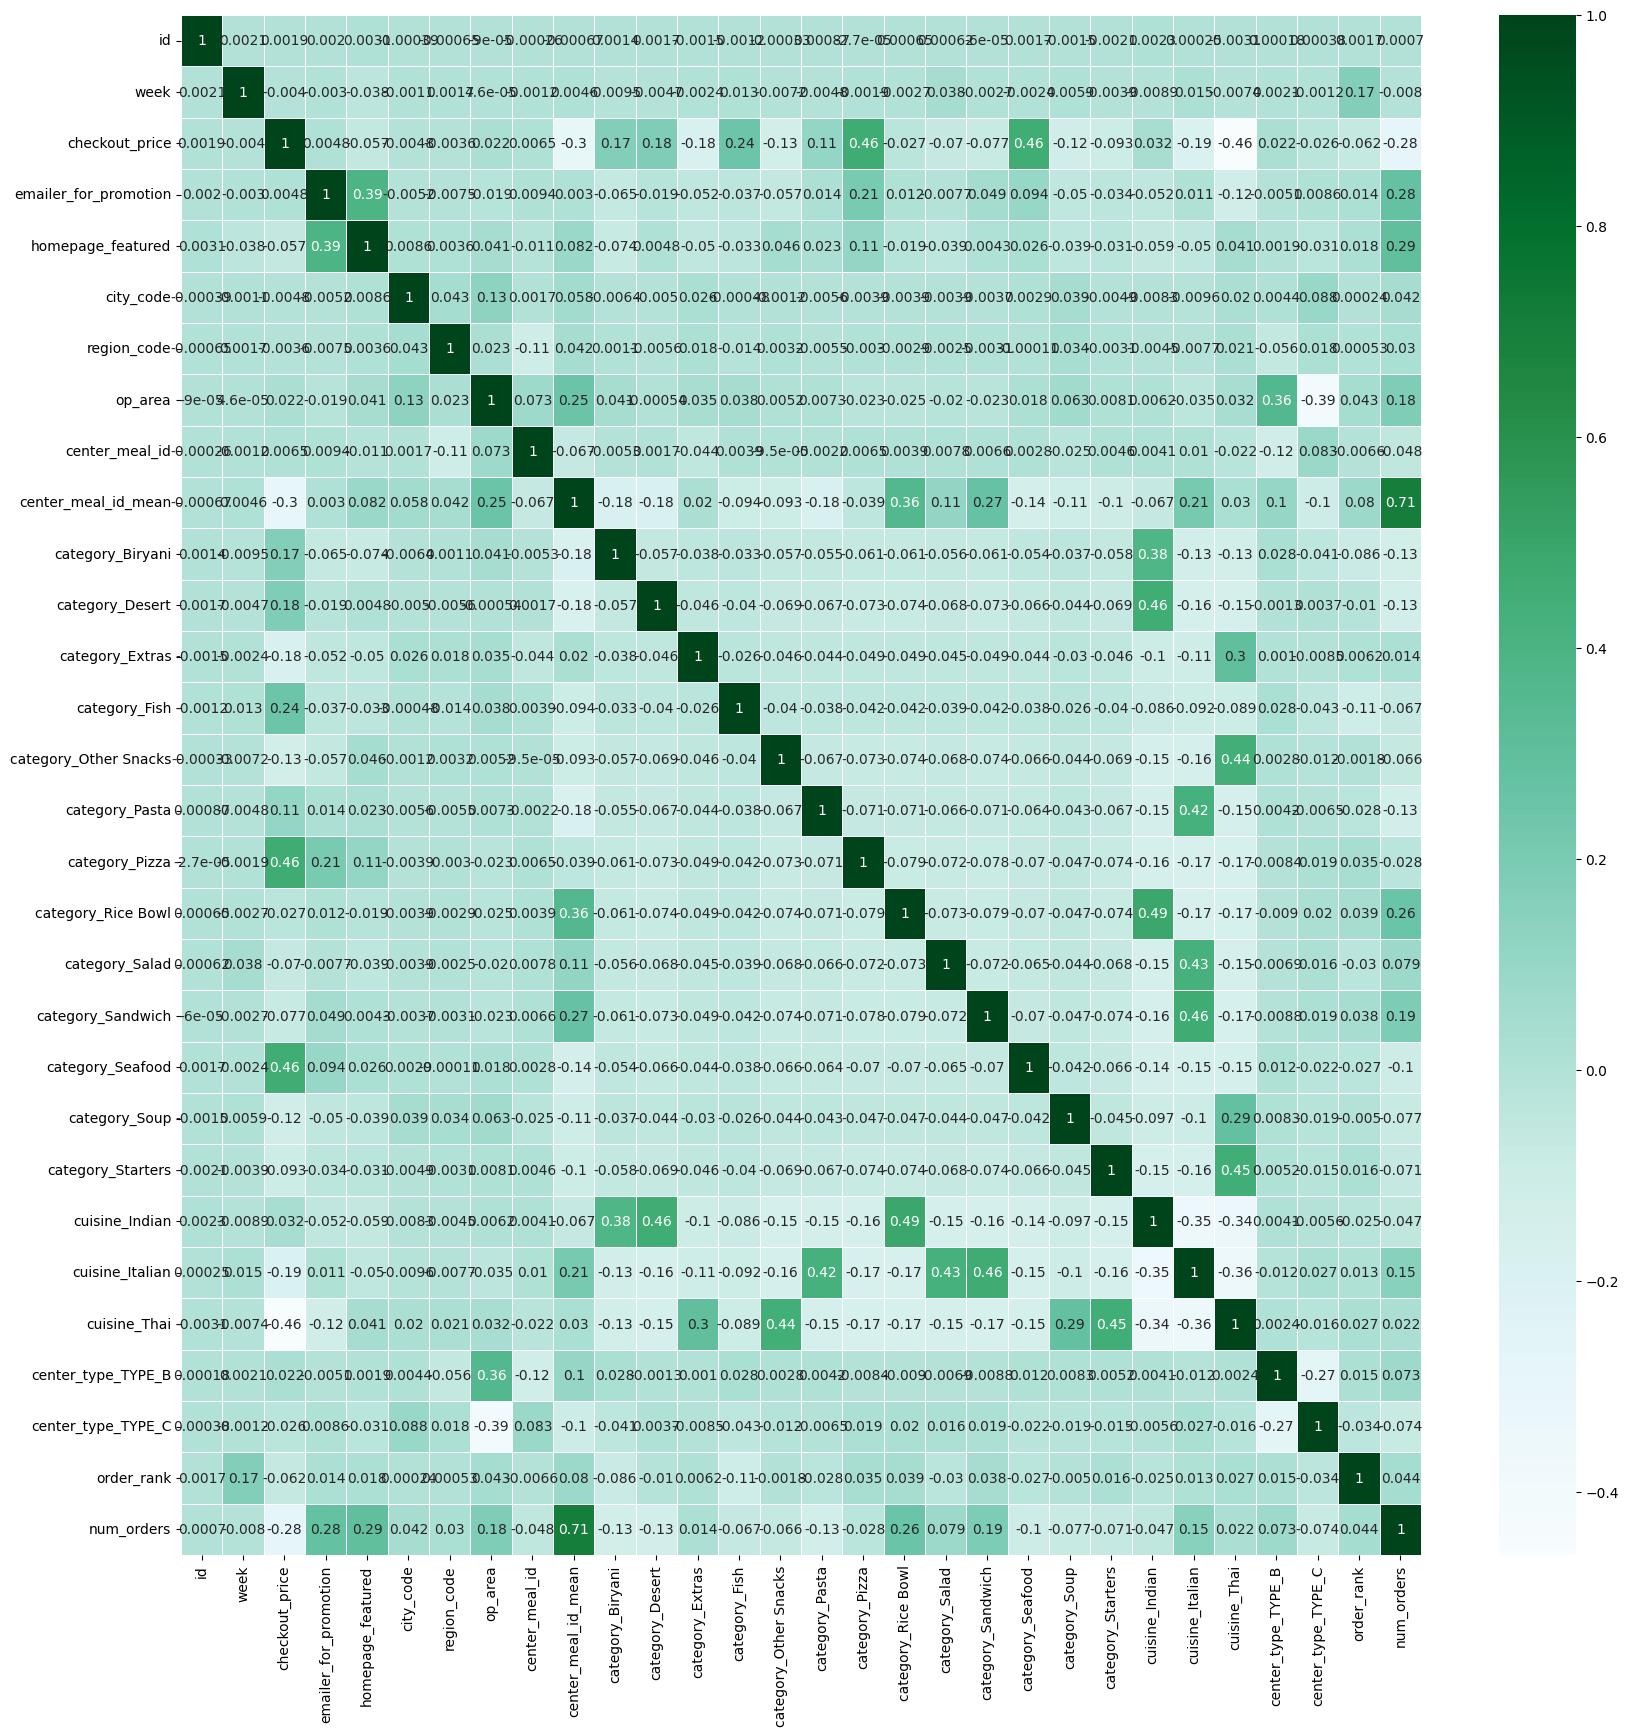

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='BuGn', linewidths=0.5)

In [ ]:
# add week from Train to data with de name of week_firts
data['week_first'] = Train['week']


In [ ]:
data.tail(2)

,id,week,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_meal_id,center_meal_id_mean,...,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,order_rank,num_orders,week_first
456546,1147725,41,243.50,0,0,473,77,4.5,2531,444.362205,...,0,0,0,1,0,0,0,127,729,145
456547,1361984,41,292.03,0,0,473,77,4.5,2528,270.283333,...,0,0,0,1,0,0,0,120,162,145


In [ ]:
# Split the data into train and test (The last 10 weeks will be used as test data)
train_data_m= data[data['week_first'] <= 135].copy()
test_data_m = data[data['week_first'] > 135].copy()

# Drop the week_first column
train_data_m.drop('week_first', axis=1, inplace=True)
test_data_m.drop('week_first', axis=1, inplace=True)

# Split the train data into features and target
X_train = train_data_m.drop('num_orders', axis=1)
y_train = train_data_m['num_orders']
X_test = test_data_m.drop('num_orders', axis=1)
y_test = test_data_m['num_orders']

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((423727, 29), (32821, 29), (423727,), (32821,))

In [ ]:
# Random Forest Regressor
# Create the model and use GridSearchCV to find the best hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Hipermarameters to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model
rf = RandomForestRegressor(random_state=42)

In [ ]:
# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv= 3 ,n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
# Fit the model
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Best hyperparameters
grid_search_rf.best_params_

# Best score
grid_search_rf.best_score_

# Best model
best_rf = grid_search_rf.best_estimator_

In [ ]:
#Save best model with pickle in FOOD DEMAND/best_model folder

import pickle

filename = 'best_models/best_rf_model.sav'
pickle.dump(best_rf, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Predictions
y_pred_rf = best_rf.predict(X_test)

# Metrics for train and test
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train
y_pred_train_rf = best_rf.predict(X_train)
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print('Train MAE:', mean_absolute_error(y_train, y_pred_train_rf))

# Test
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('Test MAE:', mean_absolute_error(y_test, y_pred_rf))

Train RMSE: 153.20159041696954
Train MAE: 77.2984584621378
Test RMSE: 122.35584500842108
Test MAE: 72.94024958560948


In [ ]:
test_data.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0


In [ ]:
# Unir Train y Test
complete = pd.concat([Train, test_data], axis=0)

complete.isnull().sum()

id                           0
week                         0
center_id                    0
meal_id                      0
checkout_price               0
base_price                   0
emailer_for_promotion        0
homepage_featured            0
num_orders               32573
dtype: int64

In [ ]:
# make a funtion to transform the test data

def transform_data(df):
    df = merge_data(df)
    df.drop('base_price', axis=1, inplace=True)
    df['center_meal_id'] = df['center_id'].astype(str) + '_' + df['meal_id'].astype(str)
    df.drop(['center_id', 'meal_id'], axis=1, inplace=True)
    df['center_meal_id'] = df['center_meal_id'].astype('category').cat.codes
    
    # Calcula el mapeo de codificación promedio solo para center_meal_id sin valores nulos en num_orders
    df_mean_encoding = df.dropna(subset=['num_orders']).groupby('center_meal_id')['num_orders'].mean().to_dict()
    df['center_meal_id_mean'] = df['center_meal_id'].map(df_mean_encoding)
    
    df['week'] = ((df['week'] - 1) % 52) + 1
    df = pd.get_dummies(df, columns=['category', 'cuisine', 'center_type'], drop_first=True, dtype=int)
    df['order_rank'] = df.groupby('center_meal_id').cumcount() + 1
    df['week_first'] = df['week']
    df.drop('week_first', axis=1, inplace=True)
    return df

In [ ]:
complete = transform_data(complete)

In [ ]:
complete.sample(25)

,id,week,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_meal_id,...,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,order_rank
109949,1121498,38,631.53,0,0,14.0,553,77,4.4,2586,...,0,1,0,0,0,0,0,0,0,24
323386,1436575,1,639.23,0,0,68.0,683,56,3.4,1336,...,0,0,0,0,0,0,0,0,0,104
272644,1293992,37,160.11,0,0,162.0,562,77,3.8,831,...,0,0,0,0,0,1,0,1,0,89
93958,1436725,33,641.23,0,0,95.0,541,77,2.8,2395,...,0,0,0,0,0,0,0,0,1,33
415420,1444413,29,298.79,0,0,285.0,654,56,2.7,1021,...,0,0,0,0,1,0,0,0,1,133
278717,1491772,39,311.43,0,0,472.0,620,77,3.9,899,...,0,0,0,0,0,1,0,0,0,75
47817,1381946,17,244.50,0,0,41.0,604,56,3.5,1778,...,0,0,1,0,0,0,1,0,0,15
278534,1053692,39,494.70,0,0,203.0,556,77,4.8,2137,...,0,0,0,0,0,0,0,0,0,91
311728,1142139,49,186.24,0,0,161.0,604,56,3.5,1750,...,0,0,0,0,0,0,1,0,0,99
103107,1232844,36,256.08,0,0,13.0,703,56,4.8,3304,...,0,0,1,0,0,0,1,0,0,26


In [ ]:
complete.isnull().sum()

id                           0
week                         0
checkout_price               0
emailer_for_promotion        0
homepage_featured            0
num_orders               32573
city_code                    0
region_code                  0
op_area                      0
center_meal_id               0
center_meal_id_mean         13
category_Biryani             0
category_Desert              0
category_Extras              0
category_Fish                0
category_Other Snacks        0
category_Pasta               0
category_Pizza               0
category_Rice Bowl           0
category_Salad               0
category_Sandwich            0
category_Seafood             0
category_Soup                0
category_Starters            0
cuisine_Indian               0
cuisine_Italian              0
cuisine_Thai                 0
center_type_TYPE_B           0
center_type_TYPE_C           0
order_rank                   0
dtype: int64

In [ ]:
# Imputar los valores faltantes en center_meal_id_mean con la media de num_orders en center_meal_id
complete['center_meal_id_mean'] = complete['center_meal_id_mean'].fillna(complete['center_meal_id_mean'].mean())

In [ ]:
complete.isnull().sum()

id                           0
week                         0
checkout_price               0
emailer_for_promotion        0
homepage_featured            0
num_orders               32573
city_code                    0
region_code                  0
op_area                      0
center_meal_id               0
center_meal_id_mean          0
category_Biryani             0
category_Desert              0
category_Extras              0
category_Fish                0
category_Other Snacks        0
category_Pasta               0
category_Pizza               0
category_Rice Bowl           0
category_Salad               0
category_Sandwich            0
category_Seafood             0
category_Soup                0
category_Starters            0
cuisine_Indian               0
cuisine_Italian              0
cuisine_Thai                 0
center_type_TYPE_B           0
center_type_TYPE_C           0
order_rank                   0
dtype: int64

In [ ]:
# Train with all data and the best_rf model

# X_train_complete len 456548
X_train_complete= complete.iloc[:456548].drop('num_orders', axis=1)
y_train_complete= complete.iloc[:456548]['num_orders']
X_test_complete= complete.iloc[456548:].drop('num_orders', axis=1)

In [ ]:
X_test_complete.shape, X_train_complete.shape, y_train_complete.shape

((32573, 29), (456548, 29), (456548,))

In [ ]:
# Train the model with all data
best_rf.fit(X_train_complete, y_train_complete)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [ ]:
# Predictions
y_pred_rf_complete = best_rf.predict(X_test_complete)

In [ ]:
y_pred_rf_complete.min(), y_pred_rf_complete.max()

(16.071488640787567, 7456.917707905153)

In [ ]:
#Absolute value of the predictions
y_pred_rf_complete = np.abs(y_pred_rf_complete)

In [ ]:
# Save the predictions in a DataFrame
submission_rf_tunning = pd.DataFrame({'id': test_data['id'], 'num_orders': y_pred_rf_complete})

# Save the DataFrame in a csv file
submission_rf_tunning.to_csv('submission_rf_tunning.csv', index=False)

C:\Users\karen\AppData\Local\Temp\ipykernel_20932\163204406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


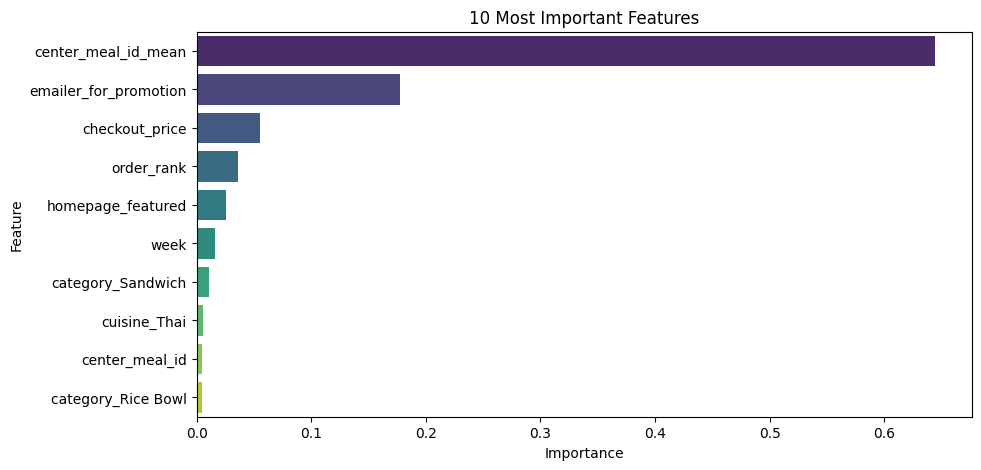

In [ ]:
#feature importance, 10 most important features
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head(10)

# Plot the 10 most important features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('10 Most Important Features')
plt.show()


### XGBoosting Regressor with poisson

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423727 entries, 0 to 423726
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     423727 non-null  int64  
 1   week                   423727 non-null  int64  
 2   checkout_price         423727 non-null  float64
 3   emailer_for_promotion  423727 non-null  int64  
 4   homepage_featured      423727 non-null  int64  
 5   city_code              423727 non-null  int64  
 6   region_code            423727 non-null  int64  
 7   op_area                423727 non-null  float64
 8   center_meal_id         423727 non-null  int16  
 9   center_meal_id_mean    423727 non-null  float64
 10  category_Biryani       423727 non-null  int32  
 11  category_Desert        423727 non-null  int32  
 12  category_Extras        423727 non-null  int32  
 13  category_Fish          423727 non-null  int32  
 14  category_Other Snacks  423727 non-null  i

In [ ]:
y_train.describe()

count    423727.000000
mean        264.550536
std         403.573030
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32821 entries, 423727 to 456547
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32821 non-null  int64  
 1   week                   32821 non-null  int64  
 2   checkout_price         32821 non-null  float64
 3   emailer_for_promotion  32821 non-null  int64  
 4   homepage_featured      32821 non-null  int64  
 5   city_code              32821 non-null  int64  
 6   region_code            32821 non-null  int64  
 7   op_area                32821 non-null  float64
 8   center_meal_id         32821 non-null  int16  
 9   center_meal_id_mean    32821 non-null  float64
 10  category_Biryani       32821 non-null  int32  
 11  category_Desert        32821 non-null  int32  
 12  category_Extras        32821 non-null  int32  
 13  category_Fish          32821 non-null  int32  
 14  category_Other Snacks  32821 non-null  int32  
 15  c

In [ ]:
# XGBoost Regressor with GridSearchCV to find the best hyperparameters and poisson objective function
#Positive values of y are required for Poisson objective function

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [ ]:
# Hyperparameters to search
param_grid_xgb = {
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.3],
}

In [ ]:
# Crear el modelo base
xgb_regressor = XGBRegressor()

# Configurar GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)



In [ ]:
# Fit the model
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300],
                         'objective': ['reg:squarederror', 'reg:tweedie']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best hyperparameters
grid_search_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'objective': 'reg:squarederror'}

In [ ]:
# Best score
grid_search_xgb.best_score_

-40242.909577310405

In [ ]:
# Best model
best_xgb = grid_search_xgb.best_estimator_
best_xgb


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Save the best model
filename = 'best_models/best_xgb_model.sav'
pickle.dump(best_xgb, open(filename, 'wb'))


In [ ]:
#Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Metrics for train and test
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train
y_pred_train_xgb = best_xgb.predict(X_train)
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('Train MAE:', mean_absolute_error(y_train, y_pred_train_xgb))

# Test
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print('Test MAE:', mean_absolute_error(y_test, y_pred_xgb))



Train RMSE: 146.19559816542375
Train MAE: 73.9826735207314
Test RMSE: 131.07488899785426
Test MAE: 76.11809051007234


In [ ]:
# Train the model with all data
best_xgb.fit(X_train_complete, y_train_complete)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions
y_pred_xgb_complete = best_xgb.predict(X_test_complete)

y_pred_xgb_complete.min(), y_pred_xgb_complete.max()

(-47.835335, 7131.865)

In [ ]:
# Absolute value of the predictions
y_pred_xgb_complete = np.abs(y_pred_xgb_complete)

In [ ]:
# Save the predictions in a DataFrame
submission_xgb_tunning = pd.DataFrame({'id': test_data['id'], 'num_orders': y_pred_xgb_complete})

# Save the DataFrame in a csv file
submission_xgb_tunning.to_csv('submission_xgb_tunning.csv', index=False)

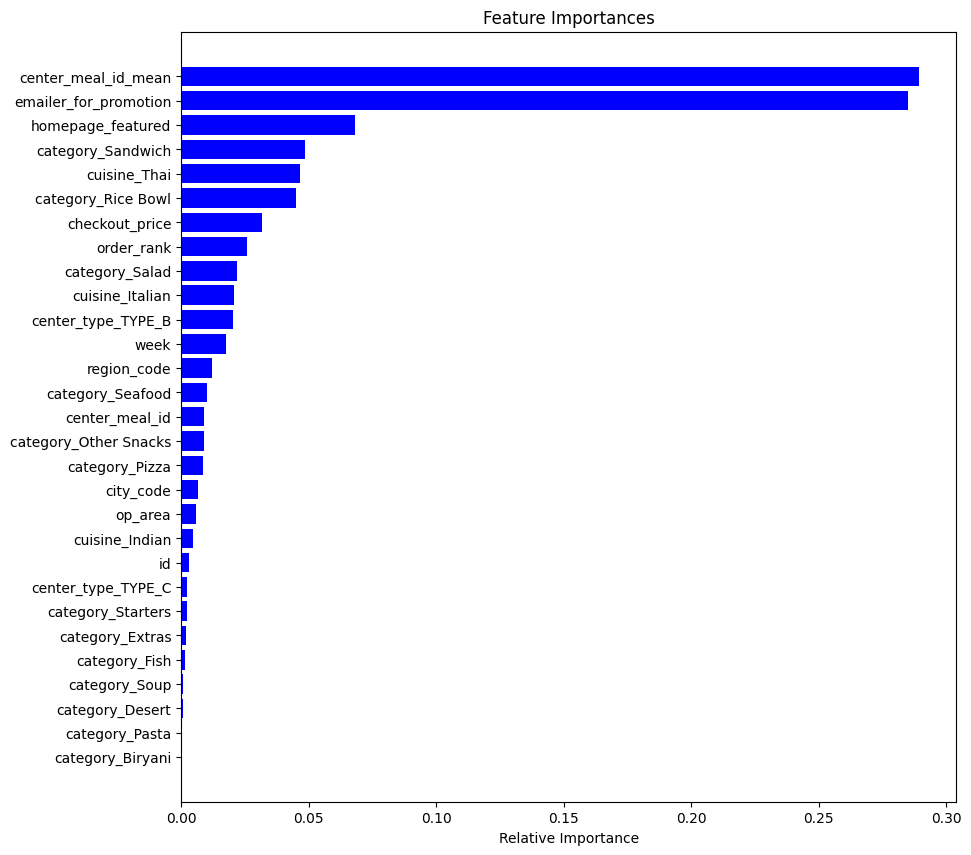

In [ ]:
# Feature importance
importances = best_xgb.feature_importances_
features = X_train_complete.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# Light GBM Regressor with GridSearchCV to find the best hyperparameters and poisson objective function
# Positive values of y are required for Poisson objective function

from lightgbm import LGBMRegressor

In [ ]:
# Hyperparameters to search
param_grid_lgbm = {
    'objective': ['regression'],
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 40, 50, 64]
}

In [ ]:
# Create the model
lgbm_regressor = LGBMRegressor()

# Create the GridSearchCV object
grid_search_lgbm = GridSearchCV(estimator=lgbm_regressor, param_grid=param_grid_lgbm, cv=2, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [ ]:
# Fit the model
grid_search_lgbm.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 423727, number of used features: 29
[LightGBM] [Info] Start training from score 264.550536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=2, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 6, 7],
                         'n_estimators': [100, 150, 200, 250],
                         'num_leaves': [31, 40, 50, 64],
                         'objective': ['regression']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best hyperparameters
grid_search_lgbm.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'num_leaves': 40,
 'objective': 'regression'}

In [ ]:
# Best score
grid_search_lgbm.best_score_

-43670.2260867224

In [ ]:
# Best model
best_lgbm = grid_search_lgbm.best_estimator_
best_lgbm

LGBMRegressor(max_depth=5, n_estimators=200, num_leaves=40,
              objective='regression')

In [ ]:
# Save the best model
filename = 'best_models/best_lgbm_model.sav'
pickle.dump(best_lgbm, open(filename, 'wb'))

In [ ]:
# Predictions
y_pred_lgbm = best_lgbm.predict(X_test)

# Metrics for train and test
# Train
y_pred_train_lgbm = best_lgbm.predict(X_train)
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train_lgbm)))
print('Train MAE:', mean_absolute_error(y_train, y_pred_train_lgbm))

# Test
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print('Test MAE:', mean_absolute_error(y_test, y_pred_lgbm))

Train RMSE: 147.9057877217005
Train MAE: 74.13570088917596
Test RMSE: 130.64496469307673
Test MAE: 75.441825982504


In [ ]:
# Train the model with all data
best_lgbm.fit(X_train_complete, y_train_complete)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 456548, number of used features: 29
[LightGBM] [Info] Start training from score 261.872760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(max_depth=5, n_estimators=200, num_leaves=40,
              objective='regression')

In [ ]:
# Predictions
y_pred_lgbm_complete = best_lgbm.predict(X_test_complete)

# Absolute value of the predictions
y_pred_lgbm_complete = np.abs(y_pred_lgbm_complete)

In [ ]:
# Save the predictions in a DataFrame
submission_lgbm_tunning = pd.DataFrame({'id': test_data['id'], 'num_orders': y_pred_lgbm_complete})

# Save the DataFrame in a csv file
submission_lgbm_tunning.to_csv('submission_lgbm_tunning.csv', index=False)


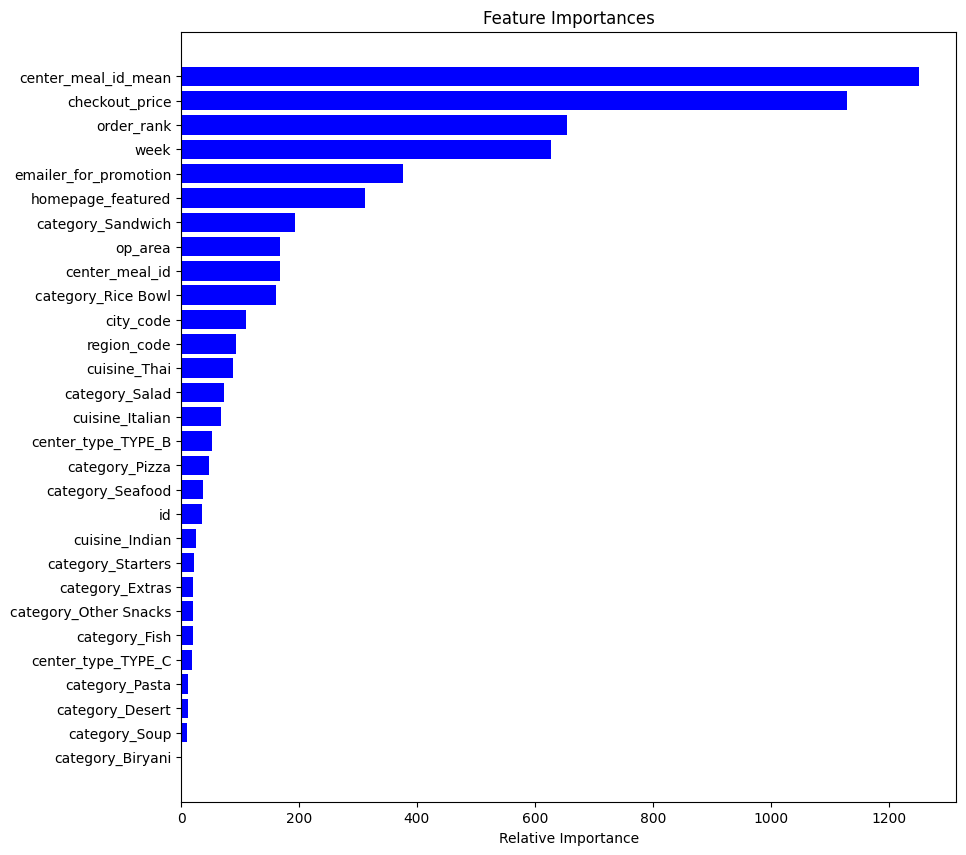

In [ ]:
# Feature importance, 10 most important features
importances = best_lgbm.feature_importances_
features = X_train_complete.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Gradient Boosting Regressor with GridSearchCV to find the best hyperparameters

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Hyperparameters to search
param_grid_gb = {
    'n_estimators': [120, 150, 170],
    'max_depth': [6, 7, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Create the model
gb_regressor = GradientBoostingRegressor()

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_grid_gb, cv=2, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model
grid_search_gb.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


c:\Users\karen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\karen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\karen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\karen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [120, 150, 170],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best hyperparameters
grid_search_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 120,
 'subsample': 1.0}

In [ ]:
# Best score
grid_search_gb.best_score_

-41251.08168919476

In [ ]:
# Best model
best_gb = grid_search_gb.best_estimator_
best_gb

GradientBoostingRegressor(max_depth=6, max_features='sqrt', n_estimators=120)

In [ ]:
# Save the best model
filename = 'best_models/best_gb_model.sav'
pickle.dump(best_gb, open(filename, 'wb'))

In [ ]:
# Predictions
y_pred_gb = best_gb.predict(X_test)

y_pred_gb.min(), y_pred_gb.max()

(-193.2989759284803, 3513.928359550277)

In [ ]:
y_pred_gb = np.abs(y_pred_gb)

# Metrics for train and test 
# Train
y_pred_train_gb = best_gb.predict(X_train)
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train_gb)))
print('Train MAE:', mean_absolute_error(y_train, y_pred_train_gb))

# Test
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print('Test MAE:', mean_absolute_error(y_test, y_pred_gb))


Train RMSE: 154.398743585772
Train MAE: 78.2098516110138
Test RMSE: 122.09486056893853
Test MAE: 72.67224269825972


In [ ]:
# Train the model with all data
best_gb.fit(X_train_complete, y_train_complete)

GradientBoostingRegressor(max_depth=6, max_features='sqrt', n_estimators=120)

In [ ]:
# Predictions
y_pred_gb_complete = best_gb.predict(X_test_complete)

y_pred_gb_complete.min(), y_pred_gb_complete.max()

(-58.21837779448562, 7174.534740465321)

In [ ]:
y_pred_gb_complete = np.abs(y_pred_gb_complete)

In [ ]:
# Save the predictions in a DataFrame
submission_gb_tunning = pd.DataFrame({'id': test_data['id'], 'num_orders': y_pred_gb_complete})

# Save the DataFrame in a csv file
submission_gb_tunning.to_csv('submission_gb_tunning.csv', index=False)
# score 	61.390230597698

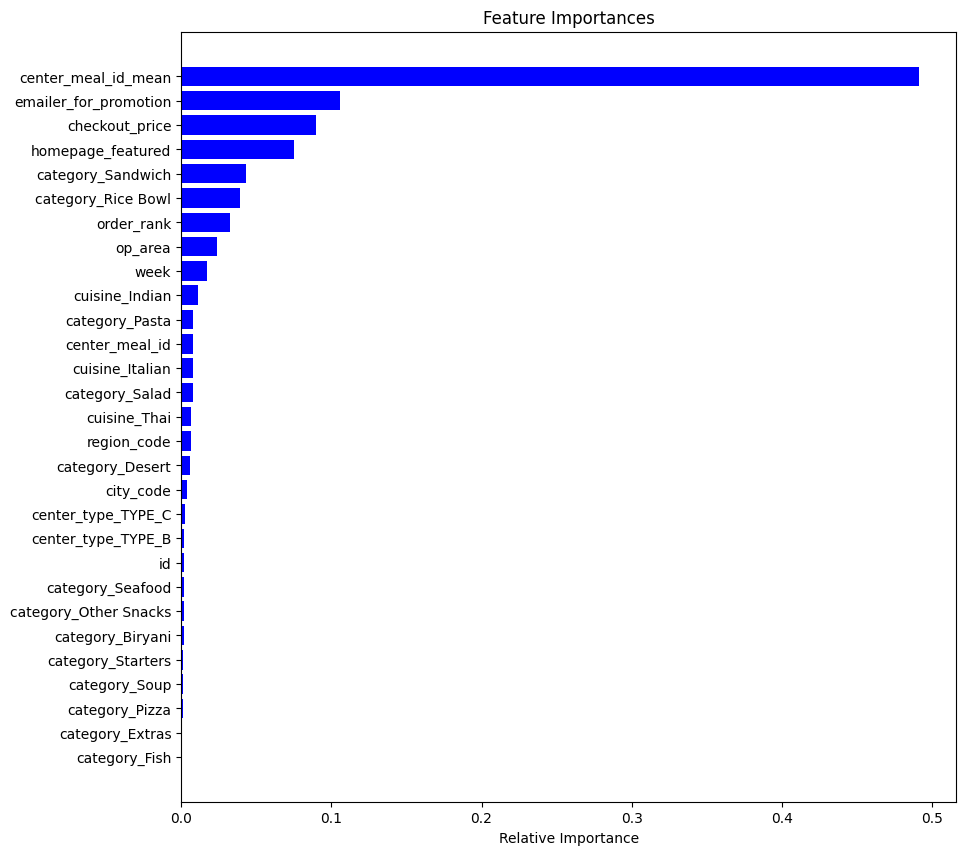

In [ ]:
#feature importance, 10 most important features

importances = best_gb.feature_importances_
features = X_train_complete.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()